In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the CSV file
pf = pd.read_csv("/content/cirrhosis.csv")

pf.head(5)


,ID,Age,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage3
0,1,21464,400,D,D-penicillamine,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,0
1,2,20617,4500,C,D-penicillamine,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,1
2,3,25594,1012,D,D-penicillamine,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,0
3,4,19994,1925,D,D-penicillamine,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,0
4,5,13918,1504,CL,Placebo,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,1


In [2]:
pf.describe()

,ID,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage3
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,418.000000,418.000000
mean,209.500000,18533.351675,1917.782297,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.692344,0.373206
std,120.810458,3815.845055,1104.672992,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.172052,0.484236
min,1.000000,9598.000000,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,1.000000,0.000000
25%,105.250000,15644.500000,1092.750000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,0.000000
50%,209.500000,18628.000000,1730.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,0.000000
75%,313.750000,21272.500000,2613.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,1.000000
max,418.000000,28650.000000,4795.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,1.000000


In [3]:
pf.shape

(418, 21)

In [4]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   Age            418 non-null    int64  
 2   N_Days         418 non-null    int64  
 3   Status         418 non-null    object 
 4   Drug           312 non-null    object 
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
pf.drop_duplicates(inplace = True) #no dupes

pf.shape

(418, 21)

In [6]:
pf.isna().sum()

ID                 0
Age                0
N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        0
Stage              6
Stage3             0
dtype: int64

In [7]:
#filling the null values with the median
pf = pf.fillna(pf.median(numeric_only=True))
pf.isna().sum()

ID                 0
Age                0
N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              6
Stage3             0
dtype: int64

In [8]:
categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

pf.dropna(subset=categorical_columns, inplace=True)

pf.isna().sum().astype(int)

ID               0
Age              0
N_Days           0
Status           0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Stage3           0
dtype: int64

In [9]:
pf.head(5)

,ID,Age,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage3
0,1,21464,400,D,D-penicillamine,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,0
1,2,20617,4500,C,D-penicillamine,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,1
2,3,25594,1012,D,D-penicillamine,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,0
3,4,19994,1925,D,D-penicillamine,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,0
4,5,13918,1504,CL,Placebo,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,1


In [10]:
X =pf[['Age','N_Days','Ascites', 'Hepatomegaly','Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',  'Tryglicerides', 'Platelets',  'Prothrombin' ]]

X.head(5)

,Age,N_Days,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,21464,400,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,20617,4500,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,25594,1012,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,19994,1925,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,13918,1504,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


In [11]:
X = pd.get_dummies(X)

X.head(5)

,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,21464,400,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,False,True,False,True,False,True,False,False,True
1,20617,4500,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,True,False,False,True,False,True,True,False,False
2,25594,1012,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,True,False,True,False,True,False,False,True,False
3,19994,1925,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,True,False,False,True,False,True,False,True,False
4,13918,1504,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,True,False,False,True,False,True,True,False,False


K MEANS CLUSTERING FROM SCRATCH

The four clusters represent the four stages of cirrhosis, thus this code is used to visualize how well the data, meaning the metrics of each element of the dataset can be separated into these stages after performing PCA dimensionality reduction.

In [12]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'Stage3' is the target variable
X = pf.drop(columns=[ 'Stage', 'ID', 'Stage3 '])  # Features (excluding ID and Stage columns)

# Preprocessing: Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Handle missing values if any
X.fillna(0, inplace=True)  # Replace NaN with 0, you may use other strategies

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans model
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster assignments and centroids
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the final centroids
print("Final centroids:")
print(centroids)

# Print the final clusters
print("Final clusters:")
print(clusters)


Final centroids:
[[ 4.45828382e-01  6.94231028e-02 -8.56368593e-02  6.65712566e-02
   3.92843976e-01  6.28236757e-01  1.59429692e-01  4.04956908e-02
   2.28202508e-01 -1.46760508e-01  1.05323289e-01 -4.53266091e-01
   1.37376755e-01  3.94077139e-01  1.74693845e-01 -1.74693845e-01
  -2.76887462e+00  2.76887462e+00  2.88675135e-01 -2.88675135e-01
  -9.93916529e-02  9.93916529e-02  4.98759723e-01 -4.98759723e-01
   8.80894880e-02  1.10384421e-01 -2.61711961e-01]
 [-1.51100146e-01 -4.18260530e-01  4.30008996e-01  4.59252345e-01
  -3.28736610e-01  2.71945404e-01  2.15939202e-01  3.56365391e-01
   4.83302526e-02 -2.02332153e-01  2.75694497e-01 -7.04009034e-01
   1.80935239e-01  6.27907143e-01 -1.58666886e-01  1.58666886e-01
   3.61157559e-01 -3.61157559e-01  2.88675135e-01 -2.88675135e-01
  -7.45437396e-01  7.45437396e-01 -6.96848691e-01  6.96848691e-01
  -2.64268464e-02  1.10384421e-01 -9.15991865e-02]
 [-1.34420662e-01  4.22801518e-01 -4.53181130e-01 -2.51652490e-01
   3.50410826e-01 -4.53

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


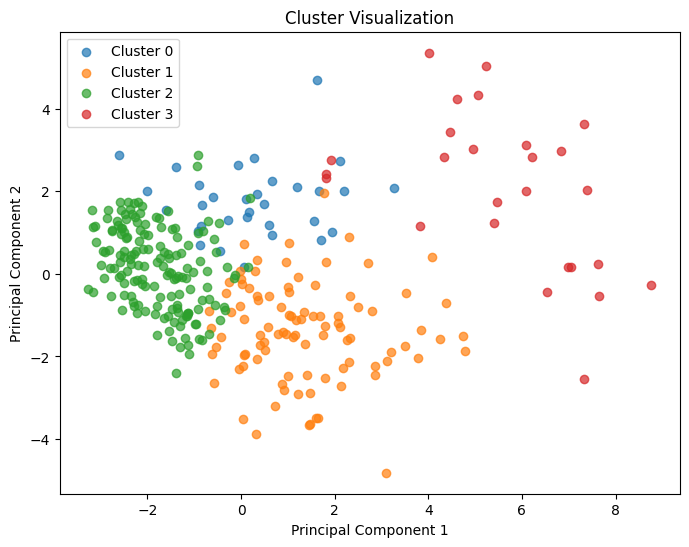

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


K MEANS FROM LIBRARY

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


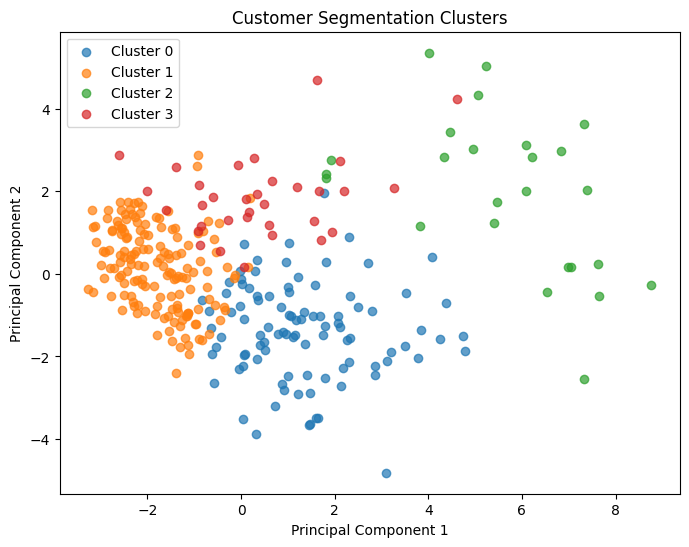

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your dataset is loaded into a DataFrame called pf
# Drop non-numeric columns if needed
columns_to_drop = ['Stage', 'ID', 'Stage3 ']
# Adjust column names as per your dataset
X = pf.drop(columns=columns_to_drop)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Handle missing values if any
X.fillna(0, inplace=True)  # Replace NaN with 0, you may use other strategies

# Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments for each data point
clusters = kmeans.labels_

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Customer Segmentation Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


DBSCAN

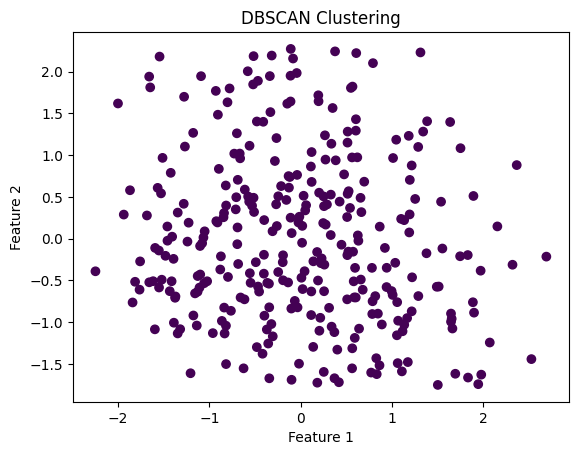

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called pf
# Drop non-numeric columns if needed
X = pf.drop(columns=['ID', 'Stage', 'Stage3 '])

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the DBSCAN model
# You can adjust the eps (maximum distance between two samples) and min_samples parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Plot clusters (assuming X has 2 features)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


Adjusting Hyperparameters

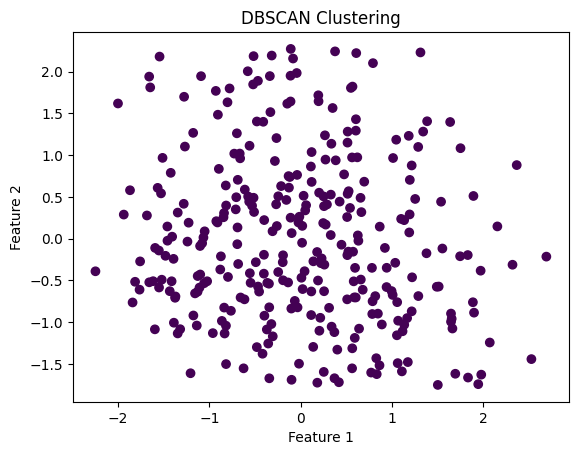

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called pf
# Drop non-numeric columns if needed
X = pf.drop(columns=['ID', 'Stage', 'Stage3 '])

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the DBSCAN model
# You can adjust the eps (maximum distance between two samples) and min_samples parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Plot clusters (assuming X has 2 features)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()
